In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


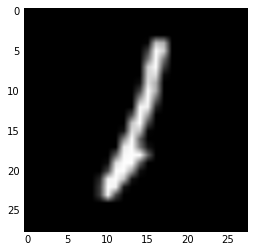

 (28, 28, 1) label =  1


In [3]:
img = mnist.train.images[123]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap = 'gray')
plt.show()

img = np.reshape(img,(28,28,1))
print img.shape, 'label = ', mnist.train.labels[123]

In [4]:
from dvd import dvd

img_embedding = dvd.get_embedding_x(img)
print img_embedding.shape

(1, 4096)


## Simple logistic Regression

In [5]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
    
clf = linear_model.LogisticRegression()
clf.fit(mnist.train.images, mnist.train.labels)

preds = clf.predict(mnist.test.images)
print accuracy_score(preds, mnist.test.labels)


0.9197


## Lets get VGG embeddings for train and test input images and convert them to transfer learnt space. 

In [6]:
train = np.reshape(mnist.train.images, (mnist.train.images.shape[0],28,28))
print 'initial training shape = ', train.shape
train = dvd.get_embedding_X(train)
print 'training shape after embedding =', train.shape

test = np.reshape(mnist.test.images, (mnist.test.images.shape[0],28,28))
test = dvd.get_embedding_X(test)


initial training shape =  (55000, 28, 28)
1.82
3.64
5.45
7.27
9.09
10.91
12.73
14.55
16.36
18.18
20.0
21.82
23.64
25.45
27.27
29.09
30.91
32.73
34.55
36.36
38.18
40.0
41.82
43.64
45.45
47.27
49.09
50.91
52.73
54.55
56.36
58.18
60.0
61.82
63.64
65.45
67.27
69.09
70.91
72.73
74.55
76.36
78.18
80.0
81.82
83.64
85.45
87.27
89.09
90.91
92.73
94.55
96.36
98.18
100.0
(55000, 4, 4, 256)
training shape after embedding = (55000, 4096)
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
(10000, 4, 4, 256)


## Model with transfer learnt features

In [7]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

clf = linear_model.LogisticRegression()
clf.fit(train, mnist.train.labels)

preds = clf.predict(test)
print accuracy_score(preds, mnist.test.labels)


0.9922


## WOW. 

An improvement of 8% by just including one line of code, this is as good as using CNN to build models. Remember, we are just using logistic regression to train the model. How good is that !

The real USP of transfer learning is that it is generic and you can feed in any image input for any classification task and use this a feature learning step. Now, let us take a moment to marvel at transfer learning. 